0 0.5794326312076077


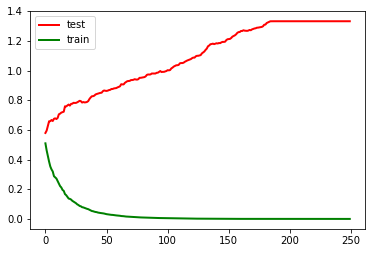

4 0.5592652977516198


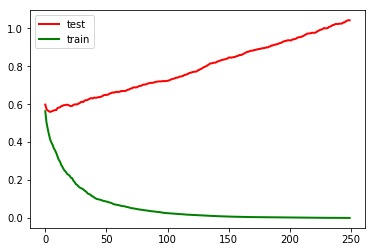

7 0.5433966679756894


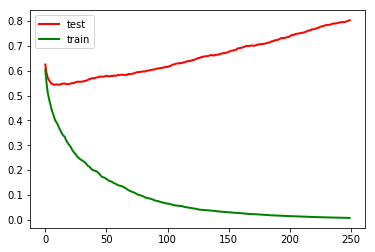

18 0.5279619242867344


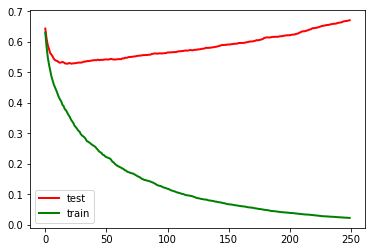

60 0.5268277687216815


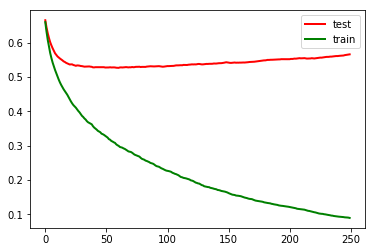

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# 1. upload data and split to train and test
data = pd.read_csv('gbm-data.csv')
X = np.array(data.loc[:, 'D1':'D1773'])
y = np.array(data['Activity'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

# 2. fit classifier

for l in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate = l)
    clf.fit(X_train, y_train)
    score_test = np.empty(len(clf.estimators_))
    score_train = np.empty(len(clf.estimators_))
    for i, pred in enumerate(clf.staged_decision_function(X_test)):
        score_test[i] = log_loss(y_test, 1 / (1 + np.exp(-pred)))
    for i, pred in enumerate(clf.staged_decision_function(X_train)):
        score_train[i] = log_loss(y_train, 1 / (1 + np.exp(-pred)))
    print(np.argmin(score_test), score_test[np.argmin(score_test)])
    %matplotlib inline
    plt.figure()
    plt.plot(score_test, 'r', linewidth=2)
    plt.plot(score_train, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

In [94]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=241, n_estimators=18)
forest_clf.fit(X_train, y_train)
y_predict = forest_clf.predict_proba(X_test)
log_loss(y_test, y_predict)

0.5619013452455334